<a href="https://colab.research.google.com/github/sudishaG/PCA_Unsupervised/blob/main/BP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
#importing dataset
from google.colab import files
uploaded = files.upload()

Saving BP.csv to BP.csv


In [87]:
#reading the file
BP = pd.read_csv("BP.csv")
BP

,SBPR,DBP
0,126,78
1,128,80
2,128,82
3,130,82
4,130,84
5,132,86


In [ ]:
scaler = StandardScaler()
bp_scaled = scaler.fit_transform(BP)
bp_scaled

array([[-1.5666989 , -1.54919334],
       [-0.52223297, -0.77459667],
       [-0.52223297,  0.        ],
       [ 0.52223297,  0.        ],
       [ 0.52223297,  0.77459667],
       [ 1.5666989 ,  1.54919334]])

In [ ]:
 pca = PCA(n_components=None)
bp_pca = pca.fit_transform(bp_scaled)
bp_pca

array([[-2.20326853,  0.0123783 ],
       [-0.91699703, -0.17844808],
       [-0.36927447,  0.36927447],
       [ 0.36927447, -0.36927447],
       [ 0.91699703,  0.17844808],
       [ 2.20326853, -0.0123783 ]])

/tmp/ipython-input-86-867264643.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(bp_pca[:, 0], bp_pca[:, 1], cmap='vBP')


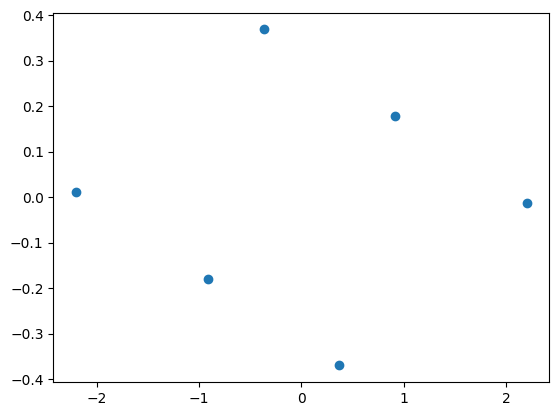

In [86]:
plt.scatter(bp_pca[:, 0], bp_pca[:, 1], cmap='bp')

In [53]:
explained_variance_ratio = pca.explained_variance_ratio_

In [54]:
# 4. Create the scree plot (similar to fviz_eig)
plt.figure(figsize=(8, 6))

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [77]:
print("\nNumber of components:")
print(pca.n_components_)


Number of components:
2


<BarContainer object of 2 artists>

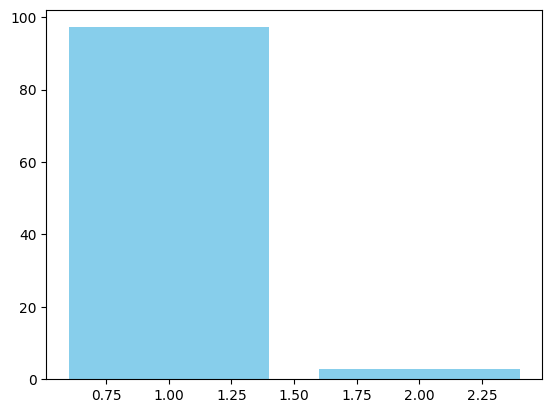

In [78]:
components = range(1, len(explained_variance_ratio) + 1)
# Plot bars with blue color
plt.bar(components, explained_variance_ratio * 100, color='skyblue')

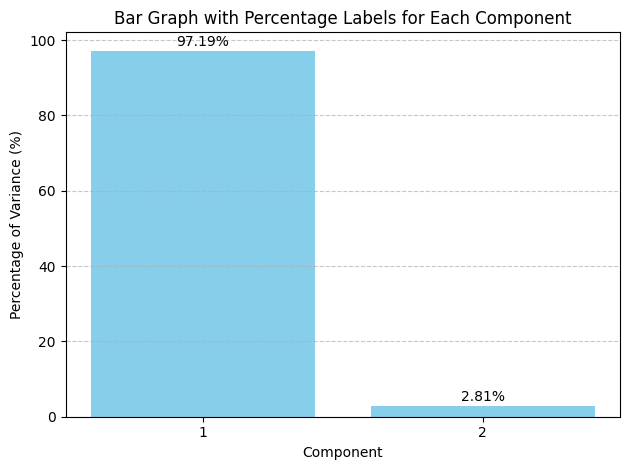

In [79]:
# Create the bar plot
bars = plt.bar(components, explained_variance_ratio * 100, color='skyblue')
# Add percentage labels on top of each bar
for bar in bars:
    yval = bar.get_height()  # Get the height of the bar (which is the percentage value)
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{yval:.2f}%', ha='center', va='bottom')

plt.xlabel("Component")
plt.ylabel("Percentage of Variance (%)")
plt.title("Bar Graph with Percentage Labels for Each Component")
plt.xticks(components)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('bar_graph_with_percentages.png')

In [80]:
# Create a DataFrame for PCA results (optional, but good for organization)
bp_pca_df = pd.DataFrame(data=bp_pca, columns=[f'PC{i+1}' for i in range(bp_pca.shape[1])])
bp_pca_df

,PC1,PC2
0,-2.203269,0.012378
1,-0.916997,-0.178448
2,-0.369274,0.369274
3,0.369274,-0.369274
4,0.916997,0.178448
5,2.203269,-0.012378


In [88]:
# Loadings (equivalent to bp.pca$rotation in R's prcomp)
print("\nComponent Loadings (Eigenvectors):")
loadings_df = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(pca.n_components_)], index=BP.columns)
print(loadings_df)


Component Loadings (Eigenvectors):
           PC1       PC2
SBPR  0.707107 -0.707107
DBP   0.707107  0.707107


Please run '!pip install adjustText' in a separate Colab cell if you need label repulsion.
Labels might overlap as 'adjustText' could not be used.


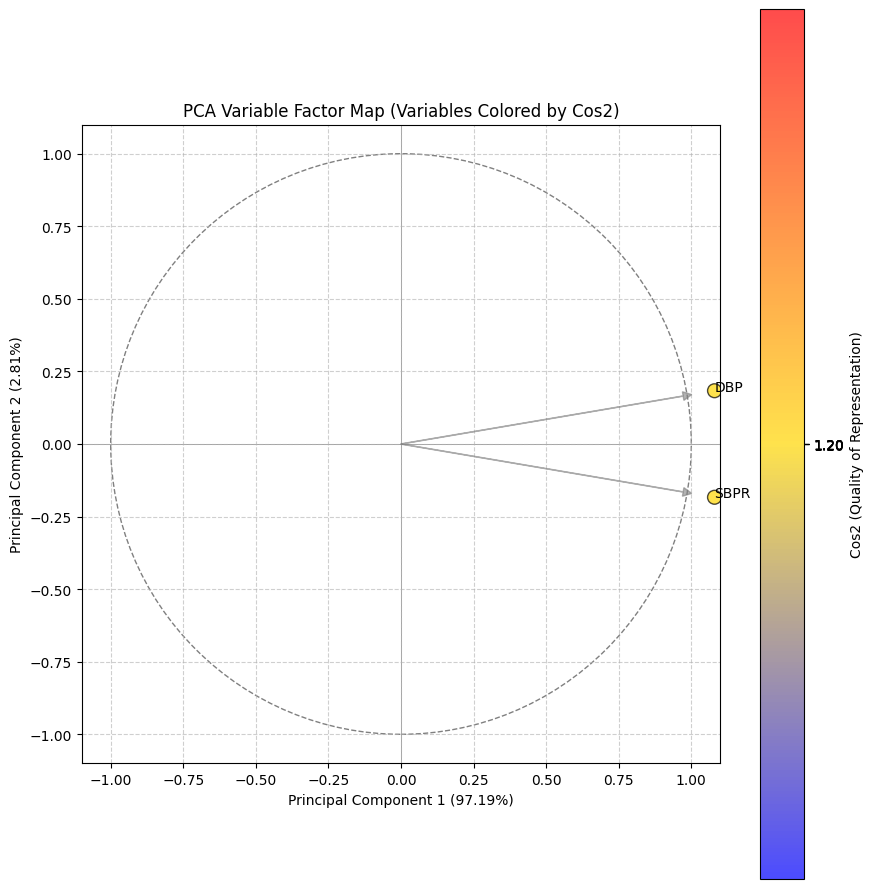

<Figure size 640x480 with 0 Axes>

In [73]:
# Get variable names from your bp data (important for labels)
variable_names = BP.columns.tolist()

var_coords = pca.components_.T * np.sqrt(pca.explained_variance_)
# Get coordinates for plotting on Principal Component 1 (PC1) and Principal Component 2 (PC2)
# corresponding to `axes=c(1,2)`
pc1_coords = var_coords[:, 0]
pc2_coords = var_coords[:, 1]
# Calculate cos2 (quality of representation) for coloring
# cos2 = (correlation of variable with PC)^2
# For a 2D plot (PC1 vs PC2), the cos2 for a variable on this plane is
# its squared correlation with PC1 plus its squared correlation with PC2.
# This indicates how well the variable is represented by these two components.
cos2_values = (pc1_coords**2) + (pc2_coords**2)
# --- 5. Plotting the PCA Variable Factor Map ---
plt.figure(figsize=(9, 9)) # Adjust figure size as needed
# Create a custom colormap based on 'gradient.cols = c("blue", "gold", "red")'
colors_for_cmap = [(0, 'blue'), (0.5, 'gold'), (1, 'red')]
custom_cmap = plt.cm.colors.LinearSegmentedColormap.from_list("custom_gradient", colors_for_cmap)

# Scatter plot of variables, colored by their cos2 values
# Normalize cos2_values for the colormap, adding a small epsilon to avoid division by zero if max is zero
norm = plt.Normalize(vmin=cos2_values.min(), vmax=cos2_values.max() + 1e-9)

scatter = plt.scatter(pc1_coords, pc2_coords,
                      c=cos2_values, cmap=custom_cmap,
                      s=100, edgecolors='black', alpha=0.7, zorder=3) # zorder to ensure points are on top

# Add variable names as text labels
texts = []
for i, var_name in enumerate(variable_names):
    texts.append(plt.text(pc1_coords[i], pc2_coords[i], var_name, fontsize=10))

# Add arrows from the origin to each variable point
for i in range(len(variable_names)):
    plt.arrow(0, 0, pc1_coords[i] * 0.9, pc2_coords[i] * 0.9, # Scale arrow slightly to prevent text overlap
              color='gray', alpha=0.6, head_width=0.03, head_length=0.03, zorder=2) # zorder to place arrows behind text

# Add the correlation circle (unit circle)
circle = plt.Circle((0, 0), radius=1, color='gray', fill=False, linestyle='--', zorder=1)
plt.gca().add_patch(circle)

# Set plot limits
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)

# Get explained variance percentages for axis labels
explained_var_pc1 = pca.explained_variance_ratio_[0] * 100
explained_var_pc2 = pca.explained_variance_ratio_[1] * 100

plt.xlabel(f"Principal Component 1 ({explained_var_pc1:.2f}%)")
plt.ylabel(f"Principal Component 2 ({explained_var_pc2:.2f}%)")
plt.title("PCA Variable Factor Map (Variables Colored by Cos2)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.axhline(0, color='gray', linewidth=0.5, zorder=0) # Add horizontal line at y=0
plt.axvline(0, color='gray', linewidth=0.5, zorder=0) # Add vertical line at x=0
plt.gca().set_aspect('equal', adjustable='box') # Ensure the plot maintains a circular aspect ratio

# Add a color bar
cbar = plt.colorbar(scatter, ax=plt.gca(), pad=0.05)
cbar.set_label("Cos2 (Quality of Representation)")
cbar.set_ticks(np.linspace(cos2_values.min(), cos2_values.max(), 5)) # Adjust ticks as needed
cbar.set_ticklabels([f'{t:.2f}' for t in np.linspace(cos2_values.min(), cos2_values.max(), 5)])

# Try to import adjustText for label repulsion
try:
    from adjustText import adjust_text
except ImportError:
    print("Warning: 'adjustText' library not found. Labels might overlap.")
    print("Please run '!pip install adjustText' in a separate Colab cell if you need label repulsion.")
    adjust_text = None # Set to None if not available

# Adjust text to avoid overlaps using adjustText (if available)
if adjust_text:
    adjust_text(texts, x=pc1_coords, y=pc2_coords,
                arrowprops=dict(arrowstyle='-', color='gray', lw=0.5, alpha=0.6))
else:
    print("Labels might overlap as 'adjustText' could not be used.")


plt.tight_layout() # Adjust layout to prevent labels/titles from overlapping
plt.show() # Display the plot
plt.savefig('pca_variable_factor_map_bp.png', dpi=300) # Save the plot for download